<a href="https://colab.research.google.com/github/Abdul-03/Healthcare-Diagnostics-and-Treatment/blob/main/Healthcare%20Diagnostics%20And%20Treatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Patient Symptoms: ['fever', 'cough', 'fatigue']

Diagnosis (Most Likely First):
- Flu (Score: 2)
- COVID-19 (Score: 2)
- Bronchitis (Score: 1)
- Anemia (Score: 1)

Suggested Treatment for Flu:
• Rest
• Hydration
• Paracetamol

Sample IoT Health Data:
                         Time  Temperature (°C)  Heart Rate (bpm)  \
0 2025-05-12 17:02:16.285478             36.84               101   
1 2025-05-12 17:03:16.285478             37.79                72   
2 2025-05-12 17:04:16.285478             36.78                79   
3 2025-05-12 17:05:16.285478             37.38               116   
4 2025-05-12 17:06:16.285478             37.50               103   

   Oxygen Level (%)  
0                90  
1                90  
2                99  
3                91  
4                99  


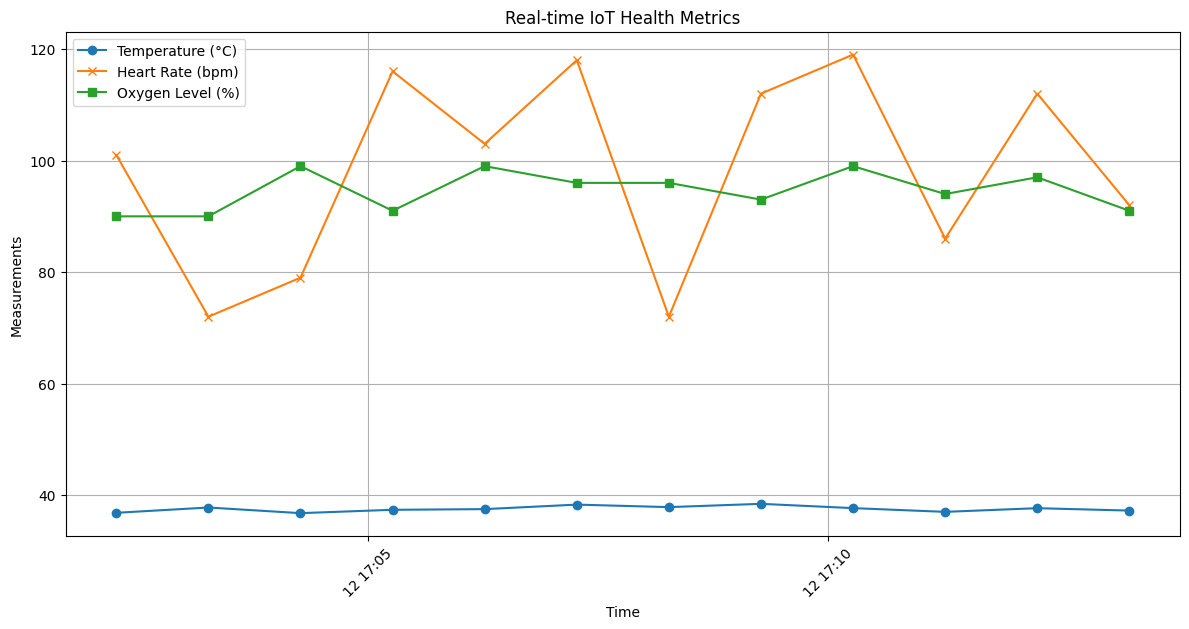

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Simulated patient symptoms
symptoms_input = ['fever', 'cough', 'fatigue']

# Simulated diagnostic model
def diagnose(symptoms):
    conditions = {
        'fever': ['Flu', 'COVID-19'],
        'cough': ['Bronchitis', 'COVID-19'],
        'fatigue': ['Anemia', 'Flu'],
    }
    diagnosis = {}
    for symptom in symptoms:
        possible_conditions = conditions.get(symptom, [])
        for condition in possible_conditions:
            diagnosis[condition] = diagnosis.get(condition, 0) + 1
    sorted_diagnosis = sorted(diagnosis.items(), key=lambda x: x[1], reverse=True)
    return sorted_diagnosis

# Simulated treatment recommendation
def suggest_treatment(condition):
    treatments = {
        'Flu': ['Rest', 'Hydration', 'Paracetamol'],
        'COVID-19': ['Isolation', 'Antiviral medication', 'Oxygen therapy'],
        'Bronchitis': ['Cough syrup', 'Antibiotics', 'Steam inhalation'],
        'Anemia': ['Iron supplements', 'Diet changes'],
    }
    return treatments.get(condition, ['Consult a doctor'])

# Simulated IoT health data generation
def generate_iot_data(minutes=10):
    base_time = datetime.now()
    data = {
        'Time': [base_time + timedelta(minutes=i) for i in range(minutes)],
        'Temperature (°C)': [round(random.uniform(36.5, 38.5), 2) for _ in range(minutes)],
        'Heart Rate (bpm)': [random.randint(70, 120) for _ in range(minutes)],
        'Oxygen Level (%)': [random.randint(90, 99) for _ in range(minutes)]
    }
    return pd.DataFrame(data)

# Plot health vitals
def plot_vitals(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Time'], df['Temperature (°C)'], label='Temperature (°C)', marker='o')
    plt.plot(df['Time'], df['Heart Rate (bpm)'], label='Heart Rate (bpm)', marker='x')
    plt.plot(df['Time'], df['Oxygen Level (%)'], label='Oxygen Level (%)', marker='s')
    plt.title('Real-time IoT Health Metrics')
    plt.xlabel('Time')
    plt.ylabel('Measurements')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

# --- Main Execution ---
print("Patient Symptoms:", symptoms_input)

# Diagnosis
diagnosis_results = diagnose(symptoms_input)
print("\nDiagnosis (Most Likely First):")
for condition, score in diagnosis_results:
    print(f"- {condition} (Score: {score})")

# Treatment
top_condition = diagnosis_results[0][0]
treatments = suggest_treatment(top_condition)
print(f"\nSuggested Treatment for {top_condition}:")
for step in treatments:
    print(f"• {step}")

# Simulate and Plot IoT data
iot_df = generate_iot_data(minutes=12)
print("\nSample IoT Health Data:\n", iot_df.head())
plot_vitals(iot_df)